## Activation Functions

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import torch
import d2l

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ReLU Function

Y has one axis


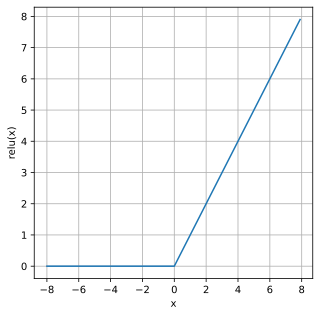

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize = (5,5))

Y has one axis


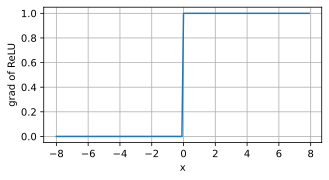

In [ ]:
# We retain graph here only to be able to run this cell several times in a row
y.backward(gradient=torch.ones(x.shape), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of ReLU', figsize=(5, 2.5))

### Sigmoid Function

Y has one axis


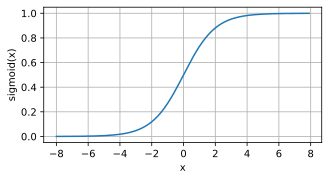

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

Y has one axis


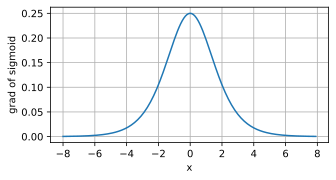

In [ ]:
# Reset gradient to avoid accumulating previous (from ReLU)
x.grad.data.zero_()
y.backward(gradient = torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

In [ ]:
#! pip install jupyter_contrib_nbextensions -q
#! jupyter contrib nbextension install --user
# from jedi import settings
# settings.case_insensitive_completion = True

### Tanh Function

Y has one axis


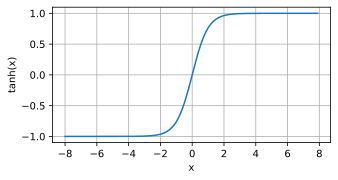

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

Y has one axis


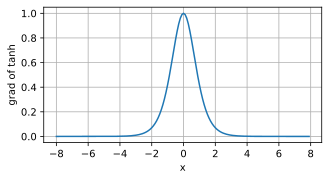

In [ ]:
x.grad.data.zero_()
y.backward(gradient = torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## Implementation of Multilayer Perceptron from Scratch

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
from torch import nn
import d2l

In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
#! pip install jupyter_contrib_nbextensions -q
#! jupyter contrib nbextension install --user
# from jedi import settings
# settings.case_insensitive_completion = True

# USE THE FOLLOWING

# %config Completer.use_jedi = False

In [ ]:
# Initialize parameters
num_inputs, num_hidden, num_outputs = 28*28, 256, 10
W1 = nn.Parameter(torch.randn((num_inputs, num_hidden), 
                              requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hidden), requires_grad=True)

W2 = nn.Parameter(torch.randn((num_hidden, num_outputs), 
                              requires_grad=True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs), requires_grad=True)

params = [W1, b1, W2, b2]

In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [ ]:
# Because we are disregarding spatial structure, 
# we reshape each two-dimensional image into a flat vector of length num_inputs.

def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = relu(X @ W1 + b1)
    H2 = H1 @ W2 + b2
    return H2

In [ ]:
loss = nn.CrossEntropyLoss(reduction = 'none')

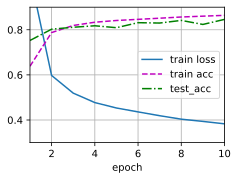

In [ ]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

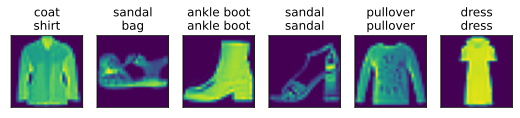

In [ ]:
d2l.predict_ch3(net, test_iter)

In [ ]:
d2l.evaluate_accuracy(net, test_iter)

0.846

### Concise Implementation

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
from torch import nn
import d2l

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(28*28, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

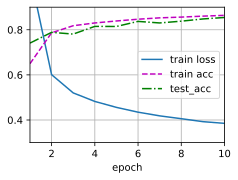

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr = lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
d2l.evaluate_accuracy(net, test_iter)

0.8545